# Gaussian Process for Event likelihoods

## Preliminary steps

### Loading necessary packages

In [1]:
using Plots
using AugmentedGaussianProcesses
using Distributions

## Creating some random data

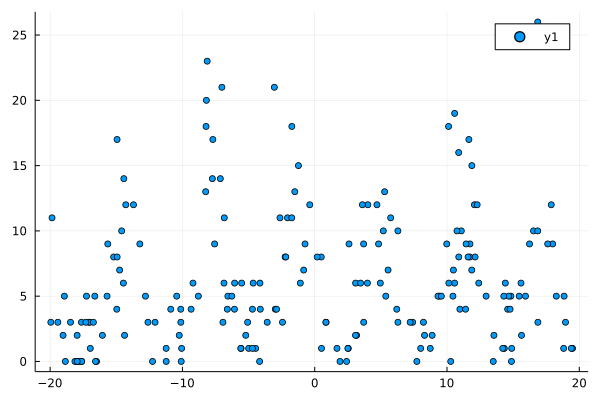

In [2]:
n_data = 200
X = (rand(n_data) .- 0.5) * 40
r = 5.0
Y = rand.(NegativeBinomial.(r, AGP.logistic.(sin.(X))))
scatter(X, Y)

## Run GP model with negative binomial likelihood to learn p

In [3]:
kernel = SqExponentialKernel() ∘ ScaleTransform(1.0)
m_negbinomial = VGP(
    X, Y, kernel, NegBinomialLikelihood(r), AnalyticVI(); optimiser=false, verbose=2
)
@time train!(m_negbinomial, 20)

[ Info: Starting training Variational Gaussian Process with a Negative Binomial Likelihood (r = 5.0) infered by Analytic Variational Inference  with 200 samples, 1 features and 1 latent GP
Training Progress: 100%|████████████████████████████████| Time: 0:00:02
  iter:  20
  ELBO:  -563.2016105014208
[ Info: Training ended after 20 iterations. Total number of iterations 20
  3.696519 seconds (6.85 M allocations: 416.398 MiB, 2.48% gc time, 97.89% compilation time)


(Variational Gaussian Process with a Negative Binomial Likelihood (r = 5.0) infered by Analytic Variational Inference , (local_vars = (c = [0.3462469755438758, 0.329503867850087, 0.2732916316240156, 0.2716321770389821, 0.3867285641636708, 0.4052586319521193, 0.5772438581014725, 0.4193008257623788, 0.3139942218440893, 0.3933977781672718  …  0.36407391766283426, 0.3584014639951441, 0.21280477276902174, 0.34438173693846996, 0.25735111075365924, 0.3112933790939419, 0.5587499230035126, 0.35592435867388467, 0.40104656334070526, 0.17773120125456257], θ = [3.4654471522179056, 2.9731482990639626, 7.950576889484581, 6.460326347756267, 3.9508814867935813, 3.9461395491789717, 3.405946340254478, 2.956805954012319, 6.9430492089015985, 5.923798190178088  …  5.44004260920063, 6.926020033980964, 4.483094352828413, 6.436511849323694, 6.464361649226514, 6.448014269628121, 6.823394092405138, 8.411389182875856, 3.4538312444576635, 4.986879618642987]), opt_state = (NamedTuple(),), hyperopt_state = (NamedTup

## Running the same model but with a Poisson likelihood

In [4]:
kernel = SqExponentialKernel() ∘ ScaleTransform(1.0)
m_poisson = VGP(
    X, Y, kernel, PoissonLikelihood(r), AnalyticVI(); optimiser=false, verbose=2
)
@time train!(m_poisson, 20)

[ Info: Starting training Variational Gaussian Process with a Poisson Likelihood (λ = 5.0) infered by Analytic Variational Inference  with 200 samples, 1 features and 1 latent GP
Training Progress: 100%|████████████████████████████████| Time: 0:00:01
  iter:  20
  ELBO:  -667.7071712111166
[ Info: Training ended after 20 iterations. Total number of iterations 20
  2.536251 seconds (4.31 M allocations: 300.974 MiB, 5.68% gc time, 93.62% compilation time)


(Variational Gaussian Process with a Poisson Likelihood (λ = 13.182863170372089) infered by Analytic Variational Inference , (local_vars = (c = [0.2893191145117333, 0.5128990337645533, 0.2398198735162764, 0.1907019572467506, 0.5790435435924604, 0.5758182050643799, 0.7597467145626133, 0.610102663158207, 0.2427008812616274, 0.35171952127116923  …  0.5560376783446168, 0.3036094738947833, 0.3427212147750089, 0.2780094625219839, 0.19982624325615797, 0.2455123234827578, 0.5779247025864676, 0.3007867048015395, 0.5657578964424581, 0.2568629273553899], θ = [3.851025007422164, 4.474447700301477, 8.793661173020464, 7.085086533882869, 5.52243078115305, 5.492221393816867, 5.181710807653619, 4.590308415681982, 7.485315069964401, 6.218947305312771  …  6.964254033892491, 7.310869820447619, 5.71475723902952, 6.844975000217887, 7.244676223079707, 6.904426153904585, 6.704444996935503, 8.798557048283087, 4.990603029213875, 6.077364793420869], γ = [5.755700573128019, 8.144219365139111, 6.67153413428143, 6.

Prediction and plot function on a grid
Create a grid and compute prediction on it

In [5]:
function compute_grid(model, n_grid=50)
    mins = -20
    maxs = 20
    x_grid = range(mins, maxs; length=n_grid) # Create a grid
    y_grid, sig_y_grid = proba_y(model, reshape(x_grid, :, 1)) # Predict the mean and variance on the grid
    return y_grid, sig_y_grid, x_grid
end

compute_grid (generic function with 2 methods)

Plot the data as a scatter plot

In [6]:
function plot_data(X, Y)
    return Plots.scatter(X, Y; alpha=0.33, msw=0.0, lab="", size=(800, 500))
end

function plot_model(model, X, Y, title=nothing)
    n_grid = 100
    y_grid, sig_y_grid, x_grid = compute_grid(model, n_grid)
    p = plot_data(X, Y)
    Plots.plot!(
        p,
        x_grid,
        y_grid;
        ribbon=2 * sqrt.(sig_y_grid), # Plot 2 std deviations
        title=title,
        color="red",
        lab="",
        linewidth=3.0,
    )
    return p
end;

## Comparison between the two likelihoods

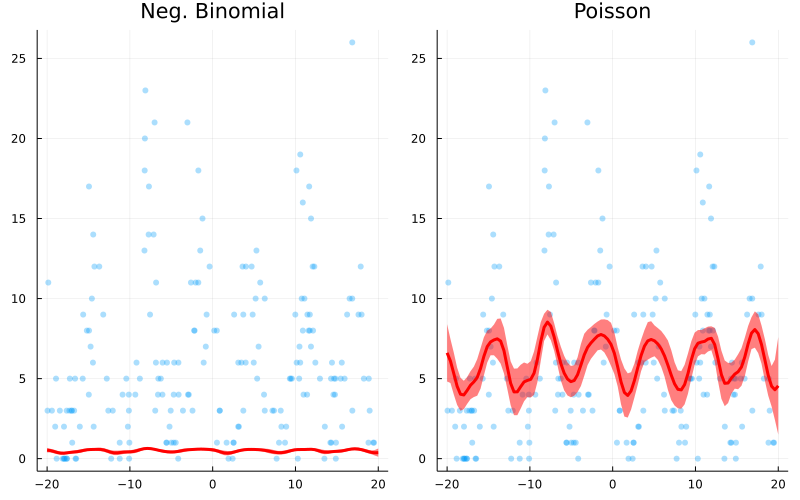

In [7]:
Plots.plot(
    plot_model.(
        [m_negbinomial, m_poisson], Ref(X), Ref(Y), ["Neg. Binomial", "Poisson"]
    )...;
    layout=(1, 2),
)

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*